# Decision Tree

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
from tqdm import tqdm
import os
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from prettytable import PrettyTable
from wordcloud import WordCloud, STOPWORDS 



C:\Users\dipali\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [3]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dipali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
sid = SentimentIntensityAnalyzer()
for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
score = sid.polarity_scores(for_sentiment)
for i in score:
    print('{0}: {1}, '.format(i, score[i]), end='')



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1> Decision Tree </h1>

##  Loading Data

In [6]:
data = pd.read_csv('preprocessed_data.csv',nrows = 50000) #I am using 50k datapoints
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [7]:
data.shape

(50000, 9)

##  calculate sentiment scores for the essay feature 

In [8]:
sent_score = []
for line in data['essay']:
    score = sid.polarity_scores(line)
    sent_score.append(score)

    

In [9]:
print(sid.polarity_scores(data["essay"][1]))


{'neg': 0.072, 'neu': 0.68, 'pos': 0.248, 'compound': 0.9897}


In [10]:
sentiment_data = pd.DataFrame(sent_score)
sentiment_data.head(2)


,neg,neu,pos,compound
0,0.013,0.783,0.205,0.9867
1,0.072,0.680,0.248,0.9897


In [11]:
data_new = pd.concat([data,sentiment_data],axis = 1)
data_new.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897


In [12]:
X = data_new.drop(['project_is_approved'], axis=1)
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897


In [13]:
y = data['project_is_approved']
y.head(2)

0    1
1    1
Name: project_is_approved, dtype: int64

##  Split your data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape),"  ",
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)

(22445, 12)
(16500, 12)
(11055, 12)
(22445,)
(16500,)
(11055,)


##  Encoding of categorical features.

### teacher prefix

In [16]:
vectorizer_teachprefix = CountVectorizer()
vectorizer_teachprefix.fit(X_train['teacher_prefix'].values) 
X_train_teachprefix_ohe = vectorizer_teachprefix.transform(X_train['teacher_prefix'].values)
X_cv_teachprefix_ohe = vectorizer_teachprefix.transform(X_cv['teacher_prefix'].values)
X_test_teachprefix_ohe = vectorizer_teachprefix.transform(X_test['teacher_prefix'].values)
print("After vectorizations")
print(X_train_teachprefix_ohe.shape, y_train.shape)
print(X_cv_teachprefix_ohe.shape, y_cv.shape)
print(X_test_teachprefix_ohe.shape, y_test.shape)


After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)


### school state

In [17]:
vectorizer_schoolstate = CountVectorizer()
vectorizer_schoolstate.fit(X_train['school_state'].values) 
X_train_schoolstate_ohe = vectorizer_schoolstate.transform(X_train['school_state'].values)
X_cv_schoolstate_ohe = vectorizer_schoolstate.transform(X_cv['school_state'].values)
X_test_schoolstate_ohe = vectorizer_schoolstate.transform(X_test['school_state'].values)
print("After vectorizations")
print(X_train_schoolstate_ohe.shape, y_train.shape)
print(X_cv_schoolstate_ohe.shape, y_cv.shape)
print(X_test_schoolstate_ohe.shape, y_test.shape)


After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)


### clean categories

In [18]:
vectorizer_cleancat = CountVectorizer()
vectorizer_cleancat.fit(X_train['clean_categories'].values) 
X_train_cleancat_ohe = vectorizer_cleancat.transform(X_train['clean_categories'].values)
X_cv_cleancat_ohe = vectorizer_cleancat.transform(X_cv['clean_categories'].values)
X_test_cleancat_ohe = vectorizer_cleancat.transform(X_test['clean_categories'].values)
print("After vectorizations")
print(X_train_cleancat_ohe.shape, y_train.shape)
print(X_cv_cleancat_ohe.shape, y_cv.shape)
print(X_test_cleancat_ohe.shape, y_test.shape)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)


### sub categories

In [19]:
vectorizer_subcat = CountVectorizer()
vectorizer_subcat.fit(X_train['clean_subcategories'].values) 
X_train_subcat_ohe = vectorizer_subcat.transform(X_train['clean_subcategories'].values)
X_cv_subcat_ohe = vectorizer_subcat.transform(X_cv['clean_subcategories'].values)
X_test_subcat_ohe = vectorizer_subcat.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_cv_subcat_ohe.shape, y_cv.shape)
print(X_test_subcat_ohe.shape, y_test.shape)


After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)


### Grades

In [20]:
vectorizer_grad = CountVectorizer()
vectorizer_grad.fit(X_train['project_grade_category'].values)
X_train_grad_ohe = vectorizer_grad.transform(X_train['project_grade_category'].values)
X_cv_grad_ohe = vectorizer_grad.transform(X_cv['project_grade_category'].values)
X_test_grad_ohe = vectorizer_grad.transform(X_test['project_grade_category'].values)
print("After vectorizations")
print(X_train_grad_ohe.shape, y_train.shape)
print(X_cv_grad_ohe.shape, y_cv.shape)
print(X_test_grad_ohe.shape, y_test.shape)


After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)


##  Encoding of numerical features

### no.of projects

In [21]:
from sklearn.preprocessing import Normalizer
normalizer_noprojects = Normalizer()
normalizer_noprojects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_noprojects_norm = normalizer_noprojects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_noprojects_norm = normalizer_noprojects.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_noprojects_norm = normalizer_noprojects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_noprojects_norm = X_train_noprojects_norm.reshape(-1,1)
X_cv_noprojects_norm = X_cv_noprojects_norm.reshape(-1,1)
X_test_noprojects_norm = X_test_noprojects_norm.reshape(-1,1)
print("after reshaping")
print(X_train_noprojects_norm.shape, y_train.shape)
print(X_cv_noprojects_norm.shape, y_cv.shape)
print(X_test_noprojects_norm.shape, y_test.shape)
print("=="*50)

after reshaping
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


### price

In [22]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
normalizer_price.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer_price.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)
print("after reshaping")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

after reshaping
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [23]:
from sklearn.preprocessing import Normalizer
normalizer_pos = Normalizer()
normalizer_pos.fit(X_train['pos'].values.reshape(1,-1))

X_train_pos_norm = normalizer_pos.transform(X_train['pos'].values.reshape(1,-1))
X_cv_pos_norm = normalizer_pos.transform(X_cv['pos'].values.reshape(1,-1))
X_test_pos_norm = normalizer_pos.transform(X_test['pos'].values.reshape(1,-1))

# again reshaping to bcz use after vecotrization it is 1,24689 but remaing all are in the form of 24689,1 
# if we donot reshape it leads to problem in stacking horizontally
X_train_pos_norm = X_train_pos_norm.reshape(-1,1)
X_cv_pos_norm = X_cv_pos_norm.reshape(-1,1)
X_test_pos_norm = X_test_pos_norm.reshape(-1,1)
print("after reshaping")
print(X_train_pos_norm.shape, y_train.shape)
print(X_cv_pos_norm.shape, y_cv.shape)
print(X_test_pos_norm.shape, y_test.shape)
print("=="*50)

after reshaping
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [24]:
from sklearn.preprocessing import Normalizer
normalizer_neg = Normalizer()
normalizer_neg.fit(X_train['neg'].values.reshape(1,-1))

X_train_neg_norm = normalizer_neg.transform(X_train['neg'].values.reshape(1,-1))
X_cv_neg_norm = normalizer_neg.transform(X_cv['neg'].values.reshape(1,-1))
X_test_neg_norm = normalizer_neg.transform(X_test['neg'].values.reshape(1,-1))


X_train_neg_norm = X_train_neg_norm.reshape(-1,1)
X_cv_neg_norm = X_cv_neg_norm.reshape(-1,1)
X_test_neg_norm = X_test_neg_norm.reshape(-1,1)
print("after reshaping")
print(X_train_neg_norm.shape, y_train.shape)
print(X_cv_neg_norm.shape, y_cv.shape)
print(X_test_neg_norm.shape, y_test.shape)
print("=="*50)

after reshaping
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [25]:
from sklearn.preprocessing import Normalizer
normalizer_neu = Normalizer()
normalizer_neu.fit(X_train['neu'].values.reshape(1,-1))

X_train_neu_norm = normalizer_neu.transform(X_train['neu'].values.reshape(1,-1))
X_cv_neu_norm = normalizer_neu.transform(X_cv['neu'].values.reshape(1,-1))
X_test_neu_norm = normalizer_neu.transform(X_test['neu'].values.reshape(1,-1))


X_train_neu_norm = X_train_neu_norm.reshape(-1,1)
X_cv_neu_norm = X_cv_neu_norm.reshape(-1,1)
X_test_neu_norm = X_test_neu_norm.reshape(-1,1)
print("after reshaping")
print(X_train_neu_norm.shape, y_train.shape)
print(X_cv_neu_norm.shape, y_cv.shape)
print(X_test_neu_norm.shape, y_test.shape)
print("=="*50)

after reshaping
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [26]:
from sklearn.preprocessing import Normalizer
normalizer_comp = Normalizer()
normalizer_comp.fit(X_train['compound'].values.reshape(1,-1))

X_train_comp_norm = normalizer_comp.transform(X_train['compound'].values.reshape(1,-1))
X_cv_comp_norm = normalizer_comp.transform(X_cv['compound'].values.reshape(1,-1))
X_test_comp_norm = normalizer_comp.transform(X_test['compound'].values.reshape(1,-1))

    
X_train_comp_norm = X_train_comp_norm.reshape(-1,1)
X_cv_comp_norm = X_cv_comp_norm.reshape(-1,1)
X_test_comp_norm = X_test_comp_norm.reshape(-1,1)
print("after reshaping")
print(X_train_comp_norm.shape, y_train.shape)
print(X_cv_comp_norm.shape, y_cv.shape)
print(X_test_comp_norm.shape, y_test.shape)
print("=="*50)

after reshaping
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


## perform tfidf vectorization of text data.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer_tfidf.fit(X_train['essay'].values)
# we use the fitted CountVectorizer to convert the text to vector
X_train_ess_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_ess_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_ess_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_ess_tfidf.shape, y_train.shape)
print(X_cv_ess_tfidf.shape, y_cv.shape)
print(X_test_ess_tfidf.shape, y_test.shape)

After vectorizations
(22445, 72358) (22445,)
(11055, 72358) (11055,)
(16500, 72358) (16500,)


##  perform tfidf w2v vectorization of text data.

In [28]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(data['essay'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [29]:
# computing avg w2v scores on essays
avg_w2v_vectors_train = [] 
for sentence in tqdm(X_train['essay'].values):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
    if cnt_words !=0:
        vector = vector / cnt_words
    avg_w2v_vectors_train.append(vector)
     

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:16<00:00, 1359.19it/s]


In [30]:
avg_w2v_vectors_test = [] 
for sentence in tqdm(X_test['essay'].values):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
    if cnt_words !=0:
        vector = vector / cnt_words
    avg_w2v_vectors_test.append(vector)
     

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:12<00:00, 1361.53it/s]


In [31]:
avg_w2v_vectors_cv = [] 
for sentence in tqdm(X_cv['essay'].values):
    vector = np.zeros(300)
    cnt_words = 0
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
    if cnt_words !=0:
        vector = vector / cnt_words
    avg_w2v_vectors_cv.append(vector)
     

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:07<00:00, 1520.24it/s]


## Perform weighted tfidf

In [33]:

weigthed_tfid_train  = []
for sentence in tqdm(X_train['essay'].values):
    vector = np.zeros(300)
    tf_idf_wegthed = 0
    for word in sentence.split():
        if (word in glove_words and word in tfidf_words):
            vec = model[word]
            tf_idf =  dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += vec*tf_idf
            tf_idf_wegthed += tf_idf
    if (tf_idf_wegthed != 0):
        vector = vector / tf_idf_wegthed
    weigthed_tfid_train.append(vector)
    
    

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:13<00:00, 304.19it/s]


In [34]:
weigthed_tfid_test  = []
for sentence in tqdm(X_test['essay'].values):
    vector = np.zeros(300)
    tf_idf_wegthed = 0
    for word in sentence.split():
        if (word in glove_words and word in tfidf_words):
            vec = model[word]
            tf_idf =  dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += vec*tf_idf
            tf_idf_wegthed += tf_idf
    if (tf_idf_wegthed != 0):
        vector = vector / tf_idf_wegthed
    weigthed_tfid_test.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:42<00:00, 385.92it/s]


In [35]:
weigthed_tfid_cv  = []
for sentence in tqdm(X_cv['essay'].values):
    vector = np.zeros(300)
    tf_idf_wegthed = 0
    for word in sentence.split():
        if (word in glove_words and word in tfidf_words):
            vec = model[word]
            tf_idf =  dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += vec*tf_idf
            tf_idf_wegthed += tf_idf
    if (tf_idf_wegthed != 0):
        vector = vector / tf_idf_wegthed
    weigthed_tfid_cv.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:28<00:00, 386.20it/s]


## For task 1 set 1 stack up all the features

In [37]:
from scipy.sparse import hstack
X_tr = hstack((X_train_schoolstate_ohe,X_train_teachprefix_ohe,X_train_grad_ohe,X_train_cleancat_ohe,X_train_subcat_ohe,X_train_price_norm,X_train_noprojects_norm ,X_train_ess_tfidf,X_train_neg_norm,X_train_pos_norm,X_train_neu_norm,X_train_comp_norm)).tocsr()
X_te = hstack((X_test_schoolstate_ohe,X_test_teachprefix_ohe,X_test_grad_ohe,X_test_cleancat_ohe,X_test_subcat_ohe,X_test_price_norm,X_test_noprojects_norm ,X_test_ess_tfidf,X_test_neg_norm,X_test_pos_norm,X_test_neu_norm,X_test_comp_norm)).tocsr()
X_cr = hstack((X_cv_schoolstate_ohe,X_cv_teachprefix_ohe,X_cv_grad_ohe,X_cv_cleancat_ohe,X_cv_subcat_ohe,X_cv_price_norm,X_cv_noprojects_norm ,X_cv_ess_tfidf,X_cv_neg_norm,X_cv_pos_norm,X_cv_neu_norm,X_cv_comp_norm)).tocsr()

## For task 1 set 2 stack up all the features

In [39]:
from scipy.sparse import hstack
X_tr2 = hstack((X_train_schoolstate_ohe,X_train_teachprefix_ohe,X_train_grad_ohe,X_train_cleancat_ohe,X_train_subcat_ohe,X_train_price_norm,X_train_noprojects_norm ,weigthed_tfid_train,X_train_neg_norm,X_train_pos_norm,X_train_neu_norm,X_train_comp_norm)).tocsr()
X_te2 = hstack((X_test_schoolstate_ohe,X_test_teachprefix_ohe,X_test_grad_ohe,X_test_cleancat_ohe,X_test_subcat_ohe,X_test_price_norm,X_test_noprojects_norm , weigthed_tfid_test,X_test_neg_norm,X_test_pos_norm,X_test_neu_norm,X_test_comp_norm)).tocsr()
X_cr2 = hstack((X_cv_schoolstate_ohe,X_cv_teachprefix_ohe,X_cv_grad_ohe,X_cv_cleancat_ohe,X_cv_subcat_ohe,X_cv_price_norm,X_cv_noprojects_norm ,weigthed_tfid_cv,X_cv_neg_norm,X_cv_pos_norm,X_cv_neu_norm,X_cv_comp_norm)).tocsr()


## Perform hyperparameter tuning and plot either heatmap or 3d plot.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
decisiontree = DecisionTreeClassifier(random_state=15)
distribution = {"max_depth":[1,5,10,50,500,1000],"min_samples_split":[5,10,20,40,75,100,135,270,500]}
model = RandomizedSearchCV(decisiontree,distribution,cv = 3,scoring="roc_auc",return_train_score = True,verbose = 10)
model_1 = model.fit(X_tr,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=100, max_depth=10 .............................
[CV]  min_samples_split=100, max_depth=10, score=0.6127330541205303, total=   5.1s
[CV] min_samples_split=100, max_depth=10 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  min_samples_split=100, max_depth=10, score=0.6006620270348187, total=   5.7s
[CV] min_samples_split=100, max_depth=10 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.2s remaining:    0.0s


[CV]  min_samples_split=100, max_depth=10, score=0.5954301521688357, total=   5.4s
[CV] min_samples_split=75, max_depth=5 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.8s remaining:    0.0s


[CV]  min_samples_split=75, max_depth=5, score=0.6243035385418254, total=   2.3s
[CV] min_samples_split=75, max_depth=5 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.3s remaining:    0.0s


[CV]  min_samples_split=75, max_depth=5, score=0.5949363321595199, total=   2.8s
[CV] min_samples_split=75, max_depth=5 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.3s remaining:    0.0s


[CV]  min_samples_split=75, max_depth=5, score=0.5995616600111014, total=   2.5s
[CV] min_samples_split=500, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.1s remaining:    0.0s


[CV]  min_samples_split=500, max_depth=500, score=0.5616690574417786, total= 1.1min
[CV] min_samples_split=500, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.5min remaining:    0.0s


[CV]  min_samples_split=500, max_depth=500, score=0.561420075955549, total= 1.2min
[CV] min_samples_split=500, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.7min remaining:    0.0s


[CV]  min_samples_split=500, max_depth=500, score=0.5551672810299514, total= 1.1min
[CV] min_samples_split=10, max_depth=10 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.9min remaining:    0.0s


[CV]  min_samples_split=10, max_depth=10, score=0.5967325572073906, total=   6.6s
[CV] min_samples_split=10, max_depth=10 ..............................
[CV]  min_samples_split=10, max_depth=10, score=0.5912013948654942, total=   7.3s
[CV] min_samples_split=10, max_depth=10 ..............................
[CV]  min_samples_split=10, max_depth=10, score=0.5874446030136173, total=   7.1s
[CV] min_samples_split=500, max_depth=1000 ...........................
[CV]  min_samples_split=500, max_depth=1000, score=0.5616690574417786, total= 1.1min
[CV] min_samples_split=500, max_depth=1000 ...........................
[CV]  min_samples_split=500, max_depth=1000, score=0.561420075955549, total= 1.2min
[CV] min_samples_split=500, max_depth=1000 ...........................
[CV]  min_samples_split=500, max_depth=1000, score=0.5551672810299514, total=  59.7s
[CV] min_samples_split=135, max_depth=5 ..............................
[CV]  min_samples_split=135, max_depth=5, score=0.6242669071244923, total=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 18.0min finished


In [42]:
rslt = pd.DataFrame.from_dict(model.cv_results_)
auc_tr = rslt['mean_train_score']
auc_cv = rslt['mean_test_score']
depth = rslt['param_max_depth']
split = rslt['param_min_samples_split']

In [43]:
rslt.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'param_max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

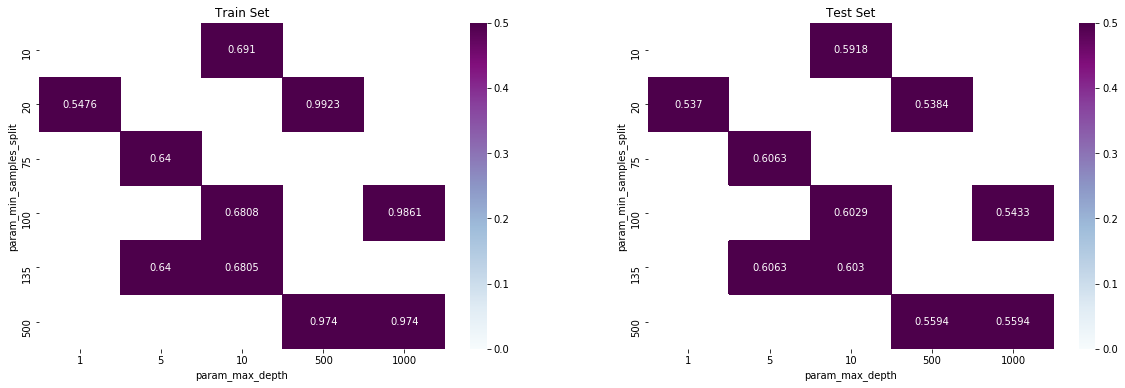

In [44]:
df = pd.DataFrame(model_1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig,ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(df.mean_train_score, annot = True, fmt='.4g', ax=ax[0],cmap="BuPu", vmin=0, vmax=0.5)
sns.heatmap(df.mean_test_score, annot = True, fmt='.4g', ax=ax[1],cmap="BuPu", vmin=0, vmax=0.5)
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()



In [117]:
model_1.best_params_

{'min_samples_split': 75, 'max_depth': 5}

In [118]:
model_1.best_estimator_.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=75,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')>

In [122]:
best_min_splits = 75
max_depth = 5

In [123]:
best_parmaetes = {"max_depth":[5],"min_samples_split":[75]}

## Training model using best hyper parmeter set1

In [125]:
# from navie biass classifer assignment
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [127]:
from  sklearn.metrics  import roc_curve, auc
classifier_for_set1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 75,class_weight = 'balanced')
classifier_for_set1.fit(X_tr,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=75,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

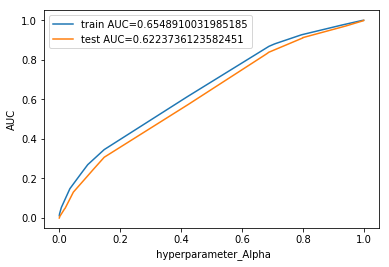

In [128]:
train_predict = batch_predict(classifier_for_set1,X_tr)
test_predict = batch_predict(classifier_for_set1,X_te)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,train_predict)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,test_predict)
plt.plot(train_fpr,train_tpr,label="train AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC="+str(auc(test_fpr,test_tpr)))
plt.xlabel(" hyperparameter_Alpha")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [129]:
print(train_predict[0:10])

[0.5850152006382079, 0.6758166925629635, 0.4871846972125186, 0.4871846972125186, 0.4871846972125186, 0.27096321438702975, 0.49494104254276877, 0.7723359129529324, 0.6722157877844943, 0.7723359129529324]


## confusion matrix on set1 

In [131]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [132]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)
print("best threshold",best_t)
print("Train confusion matrix")
confusion_set1_train = confusion_matrix(y_train, predict_with_best_t(train_predict, best_t))
print(confusion_matrix(y_train, predict_with_best_t(train_predict, best_t)))
print("Test confusion matrix")
confusion_set1_test = confusion_matrix(y_test, predict_with_best_t(test_predict, best_t))
print(confusion_matrix(y_test, predict_with_best_t(test_predict, best_t)))

the maximum value of tpr*(1-fpr) 0.3555321677986299 for threshold 0.495
best threshold 0.49494104254276877
Train confusion matrix
[[ 2082  1513]
 [ 7278 11572]]
Test confusion matrix
[[1521 1121]
 [5889 7969]]


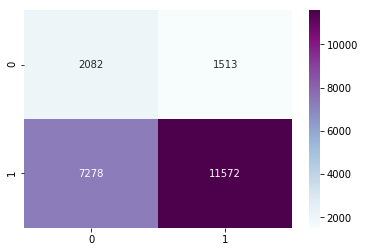

In [133]:
sns.heatmap(confusion_set1_train , annot=True,fmt="d",cmap='BuPu')

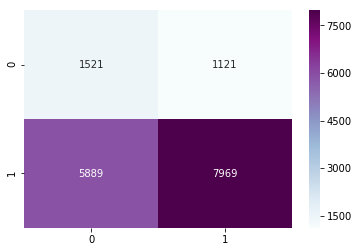

In [148]:
sns.heatmap(confusion_set1_test, annot=True,fmt="d",cmap='BuPu')

## false positive data cloud 

In [136]:
ind_list = []
list_y_test = list(y_test)
list_y_predict = predict_with_best_t(train_predict, best_t)
for i in range(len(y_test)):
               if(list_y_test[i] == 0 and list_y_predict[i] == 1):
                   ind_list.append(i)
print(len(ind_list ))

1540


In [137]:
content = []
for i in ind_list:
    content.append(X_test['essay'].values[i])


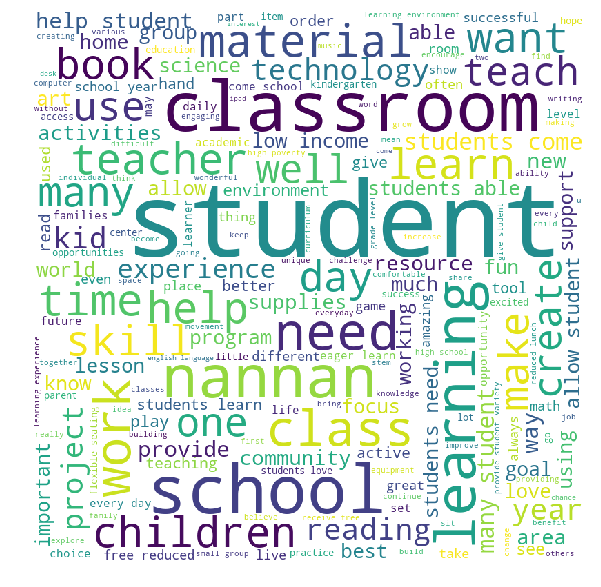

In [138]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in content: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [139]:
prices = list(X_test['price'])
print(type(prices))


<class 'list'>


In [140]:
col = X_test.columns 
falsePos_X_test = pd.DataFrame(columns=col) 
 
for i in ind_list :
    falsePos_X_test = falsePos_X_test.append(X_test.filter(items=[i], axis=0)) 
falsePos_X_test.head(2) 


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
45,oh,mrs,grades_3_5,4,literacy_language specialneeds,literature_writing specialneeds,i self contained classroom fourth fifth grader...,51.84,0.019,0.900,0.082,0.7269
88,nj,mrs,grades_prek_2,31,literacy_language,literacy,my kindergarten students eager learn read i ki...,239.91,0.027,0.657,0.316,0.9862


In [143]:
falsePos_X_test.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

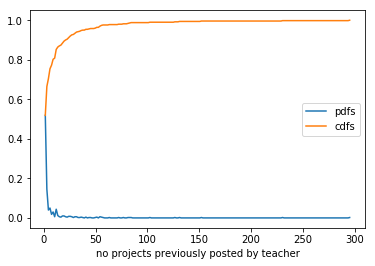

In [144]:
counts,bin_edges  = np.histogram(falsePos_X_test['teacher_number_of_previously_posted_projects'],bins = 'auto',density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdf_, =plt.plot(bin_edges[1:],pdf)
cdf_, = plt.plot(bin_edges[1:],cdf)
plt.legend([pdf_,cdf_],["pdfs","cdfs"])
plt.xlabel("no projects previously posted by teacher")
plt.show()

## Applying decsion tree on set2

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
decisiontree = DecisionTreeClassifier(random_state=15)
distribution = {"max_depth":[1,5,10,50,500,1000],"min_samples_split":[5,10,20,40,75,100,135,270,500]}
model = RandomizedSearchCV(decisiontree,distribution,cv = 3,scoring="roc_auc",return_train_score = True,verbose = 10)
model_2 = model.fit(X_tr2,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=5, max_depth=500 ..............................
[CV]  min_samples_split=5, max_depth=500, score=0.5108415723053743, total=  45.6s
[CV] min_samples_split=5, max_depth=500 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.9s remaining:    0.0s


[CV]  min_samples_split=5, max_depth=500, score=0.5337952505595166, total=  44.0s
[CV] min_samples_split=5, max_depth=500 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  min_samples_split=5, max_depth=500, score=0.5370444055387553, total=  45.4s
[CV] min_samples_split=270, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s


[CV]  min_samples_split=270, max_depth=500, score=0.5787756638913502, total=  32.2s
[CV] min_samples_split=270, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


[CV]  min_samples_split=270, max_depth=500, score=0.5957422937109093, total=  29.4s
[CV] min_samples_split=270, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.3min remaining:    0.0s


[CV]  min_samples_split=270, max_depth=500, score=0.5801536169492525, total=  29.0s
[CV] min_samples_split=270, max_depth=10 .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.8min remaining:    0.0s


[CV]  min_samples_split=270, max_depth=10, score=0.6025690303132941, total=  13.8s
[CV] min_samples_split=270, max_depth=10 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.0min remaining:    0.0s


[CV]  min_samples_split=270, max_depth=10, score=0.6065034381404415, total=  14.8s
[CV] min_samples_split=270, max_depth=10 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.3min remaining:    0.0s


[CV]  min_samples_split=270, max_depth=10, score=0.6075773671276097, total=  15.0s
[CV] min_samples_split=40, max_depth=50 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.5min remaining:    0.0s


[CV]  min_samples_split=40, max_depth=50, score=0.5380843308316021, total=  44.9s
[CV] min_samples_split=40, max_depth=50 ..............................
[CV]  min_samples_split=40, max_depth=50, score=0.5641096479702364, total=  43.0s
[CV] min_samples_split=40, max_depth=50 ..............................
[CV]  min_samples_split=40, max_depth=50, score=0.5632696092511339, total=  43.7s
[CV] min_samples_split=135, max_depth=10 .............................
[CV]  min_samples_split=135, max_depth=10, score=0.6048114437609529, total=  15.5s
[CV] min_samples_split=135, max_depth=10 .............................
[CV]  min_samples_split=135, max_depth=10, score=0.6058853992156804, total=  16.4s
[CV] min_samples_split=135, max_depth=10 .............................
[CV]  min_samples_split=135, max_depth=10, score=0.5999638104464522, total=  16.7s
[CV] min_samples_split=10, max_depth=10 ..............................
[CV]  min_samples_split=10, max_depth=10, score=0.587166846549931, total=  17.3

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 16.0min finished


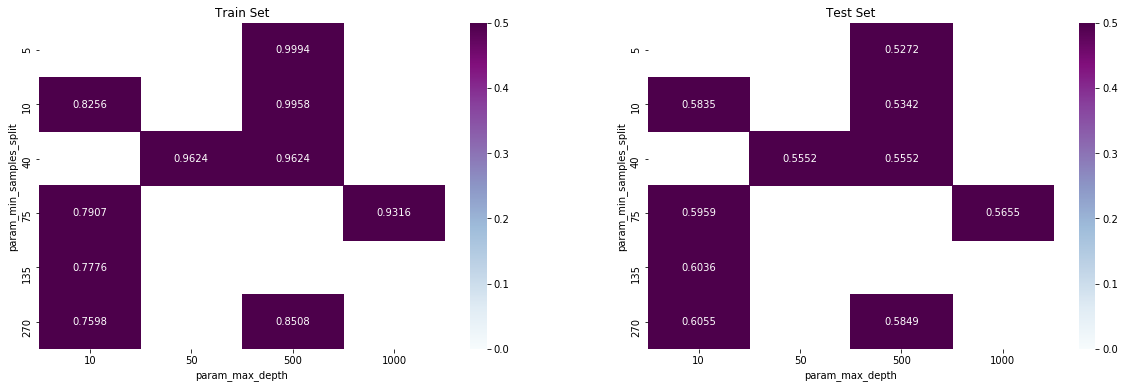

In [73]:
df = pd.DataFrame(model_2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(df.mean_train_score, annot = True, fmt='.4g', ax=ax[0],cmap="BuPu", vmin=0, vmax=0.5)
sns.heatmap(df.mean_test_score, annot = True, fmt='.4g', ax=ax[1],cmap="BuPu", vmin=0, vmax=0.5)

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [74]:
model_2.best_params_

{'min_samples_split': 270, 'max_depth': 10}

In [75]:
from  sklearn.metrics  import roc_curve, auc
classifier_for_set2 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 5,class_weight = 'balanced')
classifier_for_set2.fit(X_tr2,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

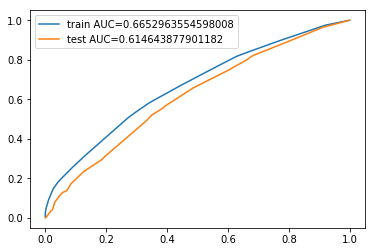

In [76]:
train_predict_2 = batch_predict(classifier_for_set2,X_tr2)
test_predict_2 = batch_predict(classifier_for_set2,X_te2)
train_fpr_2,train_tpr_2,train_thresholds_2 = roc_curve(y_train,train_predict_2)
test_fpr_2,test_tpr_2,test_thresholds_2 = roc_curve(y_test,test_predict_2)
plt.plot(train_fpr_2,train_tpr_2,label="train AUC="+str(auc(train_fpr_2,train_tpr_2)))
plt.plot(test_fpr_2,test_tpr_2,label="test AUC="+str(auc(test_fpr_2,test_tpr_2)))
plt.legend()
plt.show()

## confusion matrix

In [77]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_2 = find_best_threshold(train_thresholds_2, train_fpr_2, train_tpr_2)
print("best threshold",best_t_2)
print("Train confusion matrix")
confusion_set2_train = confusion_matrix(y_train, predict_with_best_t(train_predict_2, best_t_2))
print(confusion_matrix(y_train, predict_with_best_t(train_predict, best_t)))
print("Test confusion matrix")
confusion_set2_test = confusion_matrix(y_test, predict_with_best_t(test_predict_2, best_t_2))
print(confusion_matrix(y_test, predict_with_best_t(test_predict, best_t)))

the maximum value of tpr*(1-fpr) 0.3832393797751814 for threshold 0.477
best threshold 0.47708179476894236
Train confusion matrix
[[ 2353  1242]
 [ 6603 12247]]
Test confusion matrix
[[1523 1119]
 [5638 8220]]


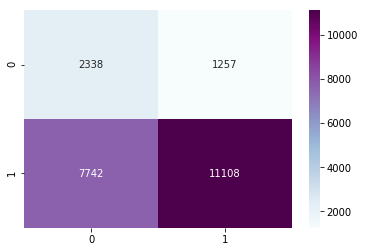

In [78]:
sns.heatmap(confusion_set2_train, annot=True,fmt="d",cmap='BuPu')

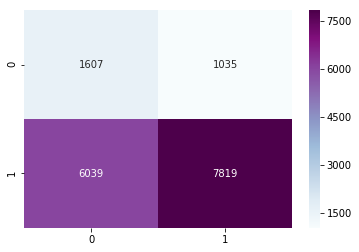

In [79]:
sns.heatmap(confusion_set2_test, annot=True,fmt="d",cmap='BuPu')

In [80]:
ind_list_2 = []
list_y_test_2 = list(y_test)
list_y_predict_2 = predict_with_best_t(train_predict_2, best_t_2)
for i in range(len(y_test)):
    if(list_y_test_2[i] == 0 and list_y_predict_2[i] == 1):
        ind_list_2.append(i)
print(len(ind_list_2))

1470


In [81]:
content_2 = []
for i in ind_list_2:
    content_2.append(X_test['essay'].values[i])

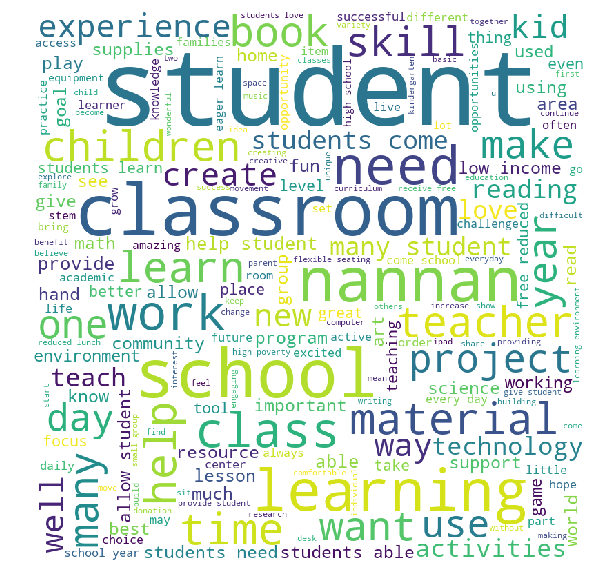

In [82]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in content_2: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [83]:
col = X_test.columns 
falsePos2_X_test = pd.DataFrame(columns=col) 
for i in ind_list_2 :
    falsePos2_X_test = falsePos2_X_test.append(X_test.filter(items=[i], axis=0)) 
falsePos2_X_test.head(1) 

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
45,oh,mrs,grades_3_5,4,literacy_language specialneeds,literature_writing specialneeds,i self contained classroom fourth fifth grader...,51.84,0.019,0.9,0.082,0.7269


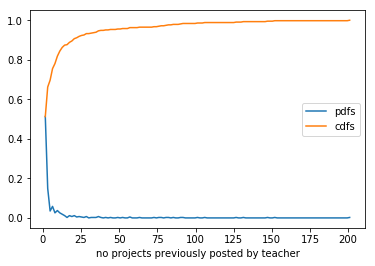

In [84]:
counts,bin_edges  = np.histogram(falsePos2_X_test['teacher_number_of_previously_posted_projects'],bins = 'auto',density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdf_, =plt.plot(bin_edges[1:],pdf)
cdf_, = plt.plot(bin_edges[1:],cdf)
plt.legend([pdf_,cdf_],["pdfs","cdfs"])
plt.xlabel("no projects previously posted by teacher")
plt.show()

In [88]:
def ImpFeatures(model,X,k=5):
      return X[:,model.best_estimator_.feature_importances_ != 0]

In [89]:
X_train_new = ImpFeatures(model_1,X_tr)
X_test_new = ImpFeatures(model_1,X_te)

## applying decision tree on top features

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
decisiontree = DecisionTreeClassifier(random_state=15)
distribution = {"max_depth":[1,5,10,50,500,1000],"min_samples_split":[5,10,20,40,75,100,135,270,500]}
model = RandomizedSearchCV(decisiontree,distribution,cv = 3,scoring="roc_auc",return_train_score = True,verbose = 10)
model_new = model.fit(X_train_new,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=135, max_depth=500 ............................
[CV]  min_samples_split=135, max_depth=500, score=0.600231919342928, total=   0.3s
[CV] min_samples_split=135, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  min_samples_split=135, max_depth=500, score=0.5928264041320923, total=   0.3s
[CV] min_samples_split=135, max_depth=500 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  min_samples_split=135, max_depth=500, score=0.577548008950139, total=   0.3s
[CV] min_samples_split=5, max_depth=10 ...............................
[CV]  min_samples_split=5, max_depth=10, score=0.5957549230766781, total=   0.1s
[CV] min_samples_split=5, max_depth=10 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  min_samples_split=5, max_depth=10, score=0.5807728515641087, total=   0.0s
[CV] min_samples_split=5, max_depth=10 ...............................
[CV]  min_samples_split=5, max_depth=10, score=0.5952034360413413, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV] min_samples_split=135, max_depth=50 .............................
[CV]  min_samples_split=135, max_depth=50, score=0.600231919342928, total=   0.3s
[CV] min_samples_split=135, max_depth=50 .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV]  min_samples_split=135, max_depth=50, score=0.5928264041320923, total=   0.3s
[CV] min_samples_split=135, max_depth=50 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s


[CV]  min_samples_split=135, max_depth=50, score=0.577548008950139, total=   0.3s
[CV] min_samples_split=10, max_depth=50 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.9s remaining:    0.0s


[CV]  min_samples_split=10, max_depth=50, score=0.5420951392232759, total=   0.5s
[CV] min_samples_split=10, max_depth=50 ..............................
[CV]  min_samples_split=10, max_depth=50, score=0.5478514511824977, total=   0.5s
[CV] min_samples_split=10, max_depth=50 ..............................
[CV]  min_samples_split=10, max_depth=50, score=0.5409031631848614, total=   0.5s
[CV] min_samples_split=270, max_depth=1000 ...........................
[CV]  min_samples_split=270, max_depth=1000, score=0.619305539997526, total=   0.2s
[CV] min_samples_split=270, max_depth=1000 ...........................
[CV]  min_samples_split=270, max_depth=1000, score=0.600036348978894, total=   0.1s
[CV] min_samples_split=270, max_depth=1000 ...........................
[CV]  min_samples_split=270, max_depth=1000, score=0.5912606479524339, total=   0.2s
[CV] min_samples_split=500, max_depth=500 ............................
[CV]  min_samples_split=500, max_depth=500, score=0.622546690457622, total=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.1s finished


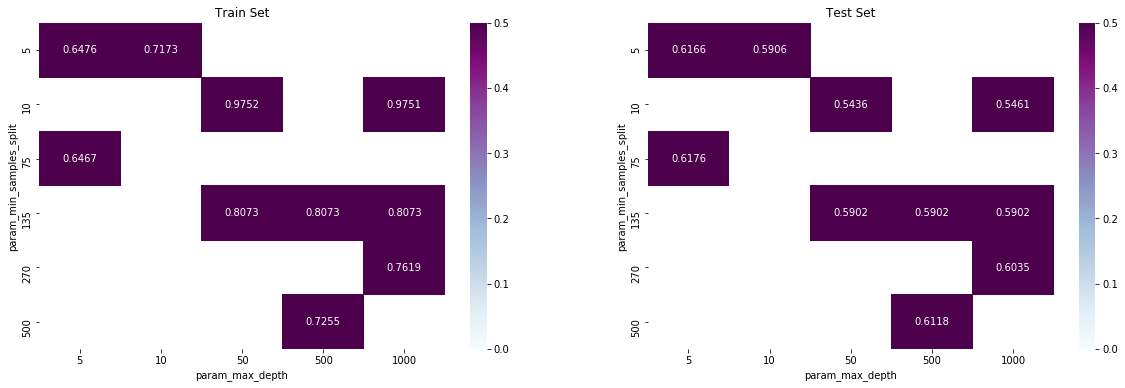

In [93]:
df = pd.DataFrame(model_new.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(df.mean_train_score, annot = True, fmt='.4g', ax=ax[0],cmap="BuPu", vmin=0, vmax=0.5)
sns.heatmap(df.mean_test_score, annot = True, fmt='.4g', ax=ax[1],cmap="BuPu", vmin=0, vmax=0.5)

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()



In [94]:
print(model_new.best_params_)
print(model_new.best_estimator_.score)

print("train auc")
print(model_new.score(X_train_new,y_train))



{'min_samples_split': 75, 'max_depth': 5}
<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=75,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')>
train auc
0.638933568948916


In [106]:
min_samples_split_f = 75
max_depth_f = 5

In [107]:
from  sklearn.metrics  import roc_curve, auc
classifier_new = DecisionTreeClassifier(max_depth = 5,min_samples_split = 75,class_weight = 'balanced')
classifier_new.fit(X_train_new,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=75,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

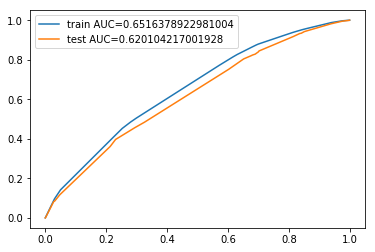

In [108]:
train_predict_new = batch_predict(classifier_new,X_train_new)
test_predict_new = batch_predict(classifier_new,X_test_new)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,train_predict_new)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,test_predict_new)
plt.plot(train_fpr,train_tpr,label="train AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.show()

In [109]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_f = find_best_threshold(train_thresholds, train_fpr, train_tpr)
print("best threshold",best_t_f)
print("Train confusion matrix")
confusion_train_new = confusion_matrix(y_train, predict_with_best_t(train_predict_new, best_t_f))
print(confusion_matrix(y_train, predict_with_best_t(train_predict_new, best_t_f)))
print("Test confusion matrix")
confusion_test_new = confusion_matrix(y_test, predict_with_best_t(test_predict_new, best_t_f))
print(confusion_matrix(y_test, predict_with_best_t(test_predict_new, best_t_f)))

the maximum value of tpr*(1-fpr) 0.35395340566584155 for threshold 0.514
best threshold 0.5138817253422518
Train confusion matrix
[[2519 1076]
 [9328 9522]]
Test confusion matrix
[[1781  861]
 [7148 6710]]


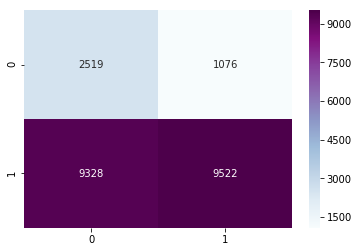

In [110]:
sns.heatmap(confusion_train_new, annot=True,fmt="d",cmap='BuPu')

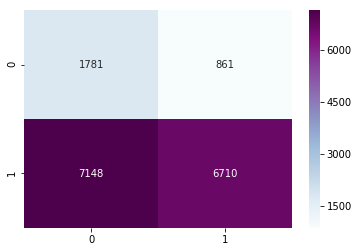

In [111]:
sns.heatmap(confusion_test_new, annot=True,fmt="d",cmap='BuPu')

In [112]:
ind_list_new = []
list_y_test_new = list(y_test)
list_y_predict_new = predict_with_best_t(train_predict_new, best_t_f)
for i in range(len(y_test)):
    if(list_y_test_new[i] == 0 and list_y_predict_new[i] == 1):
        ind_list_new.append(i)
print(len(ind_list_new))

1264


In [113]:
content_new = []
for i in ind_list_new:
    content_new.append(X_test['essay'].values[i])

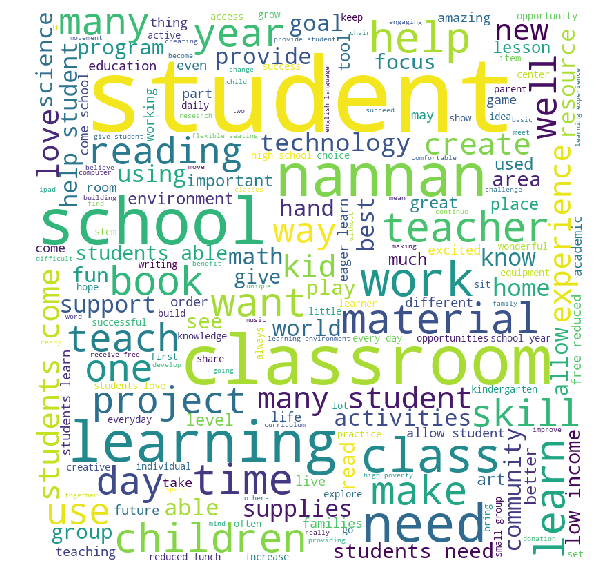

In [114]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in content_new: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [115]:
# first get the columns: 
col = X_test.columns 
falsePos_X_test_new = pd.DataFrame(columns=col) 
# get the data of the false pisitives 
for i in ind_list_new :
    falsePos_X_test_new = falsePos_X_test_new.append(X_test.filter(items=[i], axis=0)) 
falsePos_X_test_new.head(2) 


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
45,oh,mrs,grades_3_5,4,literacy_language specialneeds,literature_writing specialneeds,i self contained classroom fourth fifth grader...,51.84,0.019,0.900,0.082,0.7269
78,tn,teacher,grades_6_8,0,appliedlearning music_arts,college_careerprep visualarts,i teach rural middle school the students lot b...,4.20,0.012,0.826,0.162,0.9399


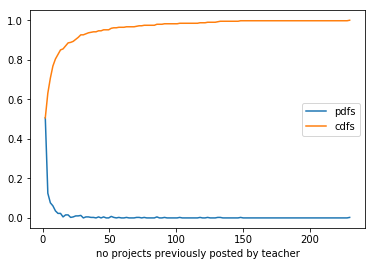

In [116]:
counts,bin_edges  = np.histogram(falsePos_X_test_new['teacher_number_of_previously_posted_projects'],bins = 'auto',density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdf_, =plt.plot(bin_edges[1:],pdf)
cdf_, = plt.plot(bin_edges[1:],cdf)
plt.legend([pdf_,cdf_],["pdfs","cdfs"])
plt.xlabel("no projects previously posted by teacher")
plt.show()

## Tabulate results

In [147]:
table = PrettyTable()
table.field_names = ("vectorization","max_Dept","Min_splits","test _Auc")
table.add_row(["TFIDF","5","75","0.62"])
table.add_row(["TFIDFW2V","10","270","0.61"])
table.add_row(["For top features","5","75","0.62"])
print(table)

+------------------+----------+------------+-----------+
|  vectorization   | max_Dept | Min_splits | test _Auc |
+------------------+----------+------------+-----------+
|      TFIDF       |    5     |     75     |    0.62   |
|     TFIDFW2V     |    10    |    270     |    0.61   |
| For top features |    5     |     75     |    0.62   |
+------------------+----------+------------+-----------+


### Reference

In [ ]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://stackoverflow.com/questions/55663030/plotting-two-heat-maps-side-by-side-in-matplotlib